# Discussion 1 - The Curse of Dimensionality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.spatial.distance import cdist
%matplotlib notebook
plt.style.use('bmh')

# Example 1 - Distance of points randomly sampled from a Gaussian PDF to its mean

In this example, we will compute the distance of a randomly sampled point from a D-dimensional Gaussian distribution to its mean (zeros-vector).

We will plot the distances as the dimensionality $D$ increases.

<IPython.core.display.Javascript object>


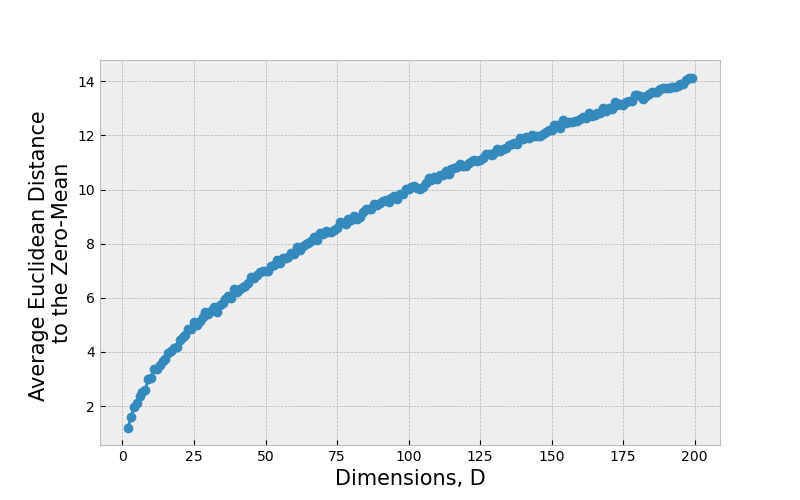

In [4]:
# Example 1 - Distance of points randomly sampled from a Gaussian PDF to its mean

D_vals = np.arange(2,200)
N_samples = 100

avg_dist = []

for D in D_vals:
    mu = np.zeros(D) # zeros-mean vector
    cov=np.eye(D) # covariance matrix is the identity matrix (no correlation, same variance accross all dimensions)

    # Defines the PDF for multivariate Gaussian random variable or RV (D-dimensions)
    X = stats.multivariate_normal(mean=mu, cov=cov)
    
    # Randomly samples N_samples points from this RV, considering only right tail
    samples = X.rvs(size=N_samples)
    
    # Compute distances of each sample to the mean
    distances = cdist(samples, mu.reshape(-1,1).T, metric='euclidean')
    
    # Append average distance to variable "avg_dist"
    avg_dist += [np.mean(distances)]

# Visualizations
plt.figure(figsize=(8,5))
plt.plot(D_vals, avg_dist,'-o')
plt.xlabel('Dimensions, D', size=15)
plt.ylabel('Average Euclidean Distance \nto the Zero-Mean', size=15);

---

# Example 2 - Distance between 2 randomly selected points in a cube of dimension D (hypercube)

In this example, we will measure the distance between two randomly selected points inside a unit D-dimensional cube (or hypercube).

We will plot this distance as the number of dimeensions $D$ increases.

<IPython.core.display.Javascript object>


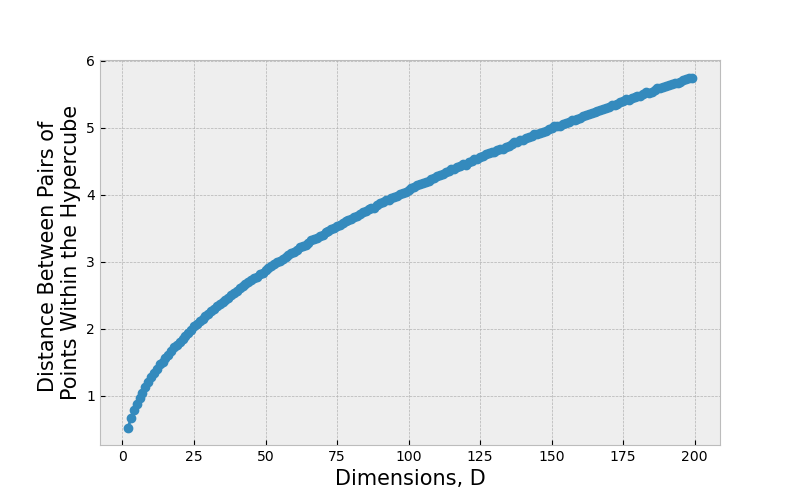

In [10]:
# Example 2 - Distance between 2 randomly selected points in a cube of dimension D (hypercube)

D_vals = np.arange(2,200) # You may change the cahnge or list of values for D
N_samples = 1_000 # You may increase the sample size here
distance_in_cube = []

for D in D_vals:
    # Randomly selecting 2 points in a unit-hypercube
    samples = stats.uniform(loc=0,scale=1).rvs(size=[N_samples,D])
    
    # Computing the Euclidean distance between points in unit hypercube
    pairwise_distances = cdist(samples, samples,metric='euclidean')
    distance_in_cube += [np.mean(pairwise_distances[np.triu_indices(N_samples,1)])] 
    
# Visualizations
plt.figure(figsize=(8,5))
plt.plot(D_vals, distance_in_cube,'-o')
plt.xlabel('Dimensions, D', size=15)
plt.ylabel('Distance Between Pairs of \nPoints Within the Hypercube', size=15);

---